In [1]:
#Import Statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import spacy

from xgboost import XGBClassifier
from sklearn.svm import LinearSVC

In [2]:
#Extract reddit data
reddit_data = pd.read_csv('../input/twitter-and-reddit-sentimental-analysis-dataset/Reddit_Data.csv')
reddit_data.rename(columns = {'clean_comment': 'text'}, inplace = True)

In [3]:
reddit_data.head()

,text,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [4]:
#Extract twitter data
twitter_data = pd.read_csv('../input/twitter-and-reddit-sentimental-analysis-dataset/Twitter_Data.csv')
twitter_data.rename(columns = {'clean_text': 'text'}, inplace = True)

In [5]:
twitter_data.head()

,text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [6]:
#Combining both dataframes into one master dataframe
data = pd.concat([reddit_data, twitter_data], ignore_index = True)

In [7]:
print(twitter_data.shape)
print(reddit_data.shape)

(162980, 2)
(37249, 2)


In [8]:
print(reddit_data.tail())
print(twitter_data.head())

                                                    text  category
37244                                              jesus         0
37245  kya bhai pure saal chutiya banaya modi aur jab...         1
37246              downvote karna tha par upvote hogaya          0
37247                                         haha nice          1
37248             facebook itself now working bjp’ cell          0
                                                text  category
0  when modi promised “minimum government maximum...      -1.0
1  talk all the nonsense and continue all the dra...       0.0
2  what did just say vote for modi  welcome bjp t...       1.0
3  asking his supporters prefix chowkidar their n...       1.0
4  answer who among these the most powerful world...       1.0


In [9]:
print(data.iloc[37244:37254,:])

                                                    text  category
37244                                              jesus       0.0
37245  kya bhai pure saal chutiya banaya modi aur jab...       1.0
37246              downvote karna tha par upvote hogaya        0.0
37247                                         haha nice        1.0
37248             facebook itself now working bjp’ cell        0.0
37249  when modi promised “minimum government maximum...      -1.0
37250  talk all the nonsense and continue all the dra...       0.0
37251  what did just say vote for modi  welcome bjp t...       1.0
37252  asking his supporters prefix chowkidar their n...       1.0
37253  answer who among these the most powerful world...       1.0


In [10]:
#Check for any null values
data.isna().sum()

text        104
category      7
dtype: int64

In [11]:
#Drop rows with null values
data.dropna(axis = 0, inplace = True)

In [12]:
#Checking the shape of the data to ensure nothing is broken
data.shape

(200118, 2)

In [13]:
#Getting Stopwords
from spacy.lang.en.stop_words import STOP_WORDS
stopwords = list(STOP_WORDS)

#Getting a list of punctuations
from string import punctuation
punct = list(punctuation)

print("Length of punctuations:\t {} \nLength of stopwords:\t {}".format(len(punct), len(stopwords)))

Length of punctuations:	 32 
Length of stopwords:	 326


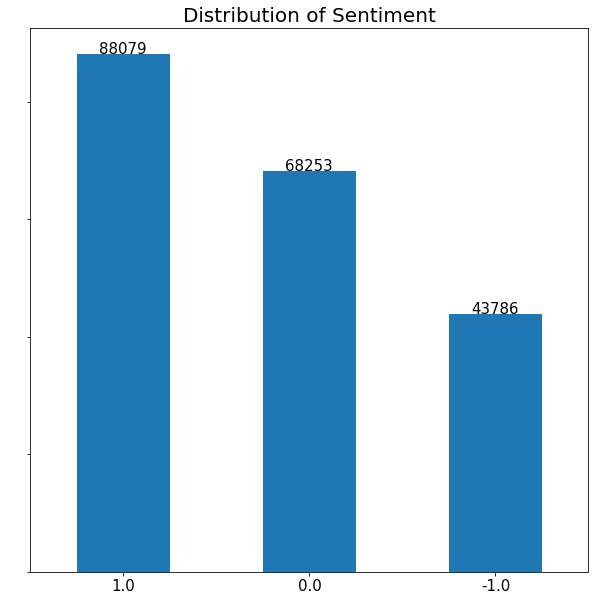

In [14]:
fig ,ax = plt.subplots(figsize = (10,10))
ax = data['category'].value_counts().plot(kind = 'bar')

plt.xticks(rotation = 0, size = 15)
plt.yticks(size = 5, color = 'white')
plt.title('Distribution of Sentiment', size = 20)

ax.annotate(text = data['category'].value_counts().values[0], xy = (-0.13,88079), size = 15)
ax.annotate(text = data['category'].value_counts().values[1], xy = (0.87,68253), size = 15)
ax.annotate(text = data['category'].value_counts().values[2], xy = (1.87,43786), size = 15)

plt.show()

In [15]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer,HashingVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
# Create a Vectorizer Object using default parameters
hash_vectorizer = HashingVectorizer()
# Convert a collection of text documents to a matrix of token counts
token_count_matrix=hash_vectorizer.fit_transform(data['text'])
print(f'The size of the count matrix for the texts = {token_count_matrix.get_shape()}')
print(f'The sparse count matrix is as follows:')
print(token_count_matrix)

# Create a tf_idf object using default parameters
tf_idf_transformer=TfidfTransformer(use_idf=True, smooth_idf=True, sublinear_tf=False) 

# Fit to the count matrix, then transform it to a normalized tf-idf representation
tf_idf_matrix = tf_idf_transformer.fit_transform(token_count_matrix)

print(f'The size of the tf_idf matrix for the texts = {tf_idf_matrix.get_shape()}')
print(f'The sparse tf_idf matrix is as follows:')
print(tf_idf_matrix)

The size of the count matrix for the texts = (200118, 1048576)
The sparse count matrix is as follows:
  (0, 66497)	0.14002800840280097
  (0, 88541)	0.28005601680560194
  (0, 99311)	0.14002800840280097
  (0, 158803)	-0.28005601680560194
  (0, 176558)	0.14002800840280097
  (0, 180525)	-0.14002800840280097
  (0, 189643)	-0.14002800840280097
  (0, 216640)	-0.14002800840280097
  (0, 246361)	-0.14002800840280097
  (0, 281416)	-0.14002800840280097
  (0, 286878)	-0.28005601680560194
  (0, 298956)	0.14002800840280097
  (0, 331884)	-0.14002800840280097
  (0, 336791)	0.14002800840280097
  (0, 570460)	-0.14002800840280097
  (0, 590295)	-0.14002800840280097
  (0, 636025)	0.14002800840280097
  (0, 639622)	-0.14002800840280097
  (0, 647008)	-0.14002800840280097
  (0, 694840)	0.14002800840280097
  (0, 699224)	-0.14002800840280097
  (0, 720710)	0.14002800840280097
  (0, 770962)	-0.14002800840280097
  (0, 777676)	0.14002800840280097
  (0, 873637)	-0.14002800840280097
  :	:
  (200117, 257965)	0.162221421

In [16]:
#Getting X and y

X = tf_idf_matrix
y = data.category

#Splitting the data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2)

In [17]:
#Creating, fitting and scoring classifier
classifier = LinearSVC()
classifier.fit(X_train, y_train)
print(f"Accuracy: {classifier.score(X_test, y_test) * 100:.3f}%", )

Accuracy: 94.361%


In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [19]:
y_pred=knn.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",knn.score(X_train,y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

        -1.0       0.81      0.06      0.11      8626
         0.0       0.36      0.99      0.53     13768
         1.0       0.91      0.09      0.17     17630

    accuracy                           0.39     40024
   macro avg       0.69      0.38      0.27     40024
weighted avg       0.70      0.39      0.28     40024

Confusion Matrix:
 [[  505  8070    51]
 [   29 13627   112]
 [   90 15912  1628]]
Training Score:
 40.291953477332065
